In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scikit-learn-knn-897/submission.csv
/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import warnings

# 데이터 불러오기

In [3]:
train = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/train.csv')
test = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/test.csv',header=None)
train_label = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/trainLabels.csv')
warnings.filterwarnings(action='ignore')

In [4]:
df = train.join(train_label,how = 'left')
df.head()

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663,1
0,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
1,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
2,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
3,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0
4,-0.773247,-0.123227,0.047423,-0.210266,10.377793,0.526604,-2.751616,0.315541,0.608603,-0.043421,...,0.792790,-0.540711,0.114115,-0.277477,-0.896411,-2.805207,0.469162,3.614157,0.081689,1


# 데이터 프레임 컬럼병 변경

In [5]:
cols_range = list(range(len(df.columns)))

df.columns = [str(i) for i in cols_range]
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40'],
      dtype='object')

In [6]:
df['40'] = df['40'].astype(str)

In [7]:
print(df.shape)
df.info()

(999, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       999 non-null    float64
 1   1       999 non-null    float64
 2   2       999 non-null    float64
 3   3       999 non-null    float64
 4   4       999 non-null    float64
 5   5       999 non-null    float64
 6   6       999 non-null    float64
 7   7       999 non-null    float64
 8   8       999 non-null    float64
 9   9       999 non-null    float64
 10  10      999 non-null    float64
 11  11      999 non-null    float64
 12  12      999 non-null    float64
 13  13      999 non-null    float64
 14  14      999 non-null    float64
 15  15      999 non-null    float64
 16  16      999 non-null    float64
 17  17      999 non-null    float64
 18  18      999 non-null    float64
 19  19      999 non-null    float64
 20  20      999 non-null    float64
 21  21      999 non-null    float

# EDA

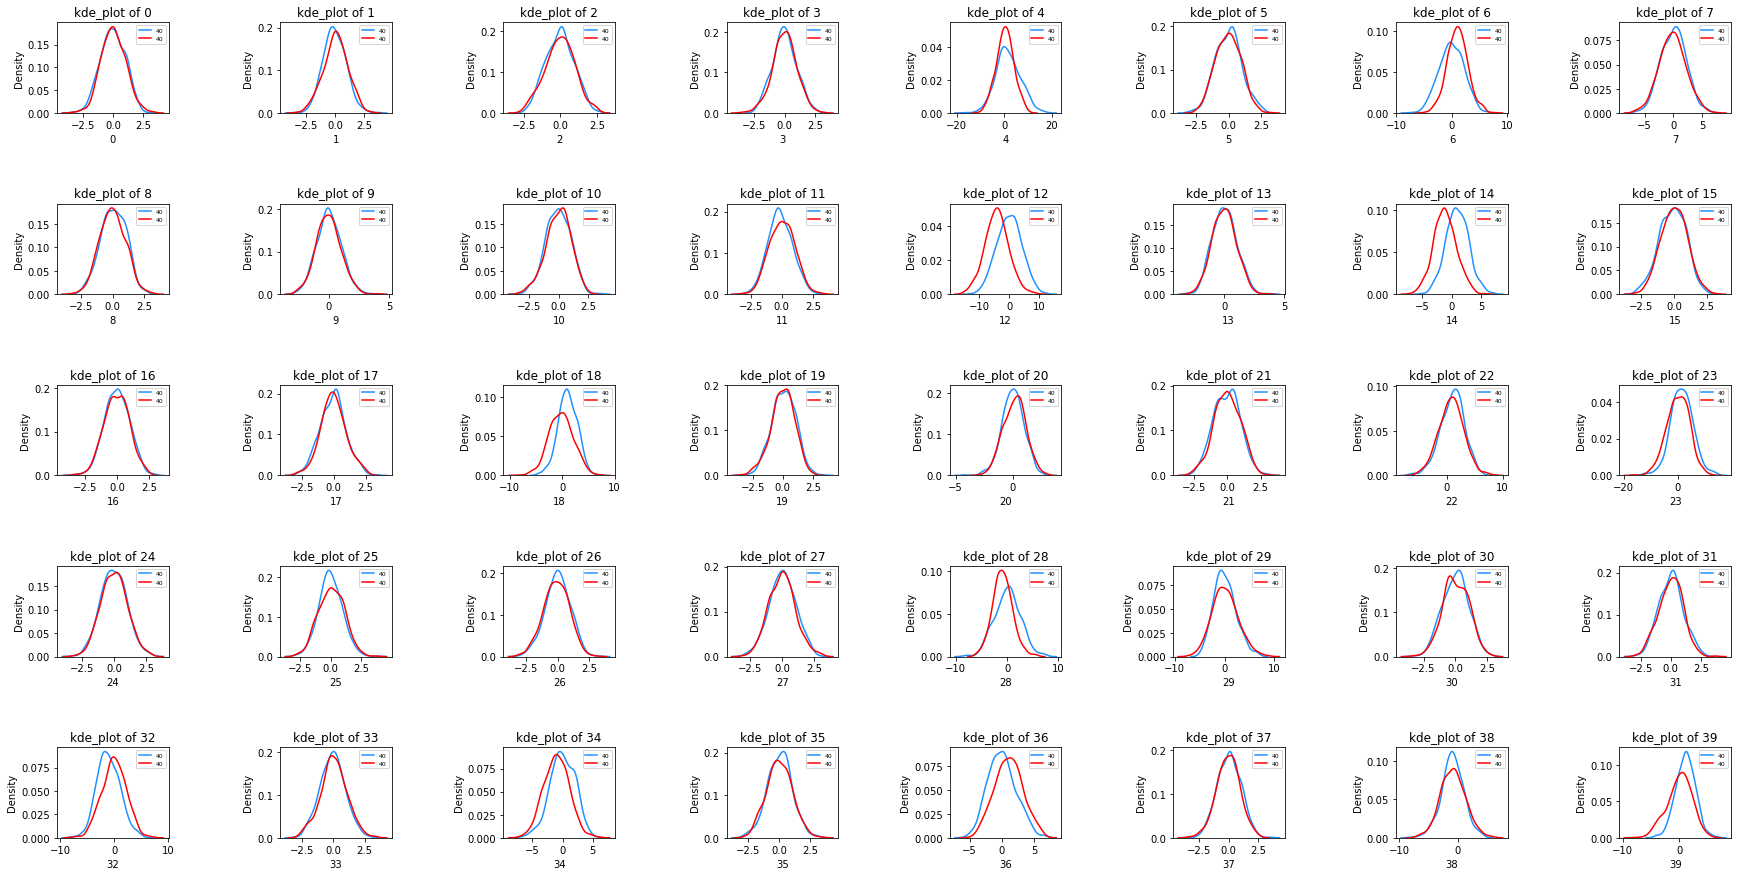

In [8]:
feature_cols = df.columns[:-1] 
target_cols = df.columns[-1]

plt.figure(figsize = [30,15])
plt.subplots_adjust(wspace = 1,hspace = 1)
for i,var in enumerate(feature_cols):
    plt.subplot(5,8,i+1)
    sns.kdeplot(data = df,
                x = var,
                hue = target_cols,
                palette = ['red','dodgerblue'],
                label = target_cols)
    plt.title(f"kde_plot of {var}")
    plt.legend(loc='upper right',  prop={'size': 6})

plt.show()

### 전부 평균이 0인 정규분포를 따르는 듯 하고, target 값과 target값이 아닌 데이터들의 확률 밀도 그래프가 큰 차이가 보이지 않음

Text(0.5, 1.0, 'hisogram of target')

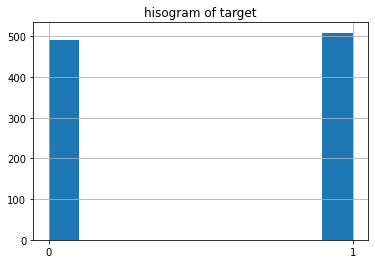

In [9]:
df['40'].hist()
plt.title('hisogram of target')

# target 값들도 각 500개 씩 비율이 비슷하다

# 상관관계 보기

<AxesSubplot:>

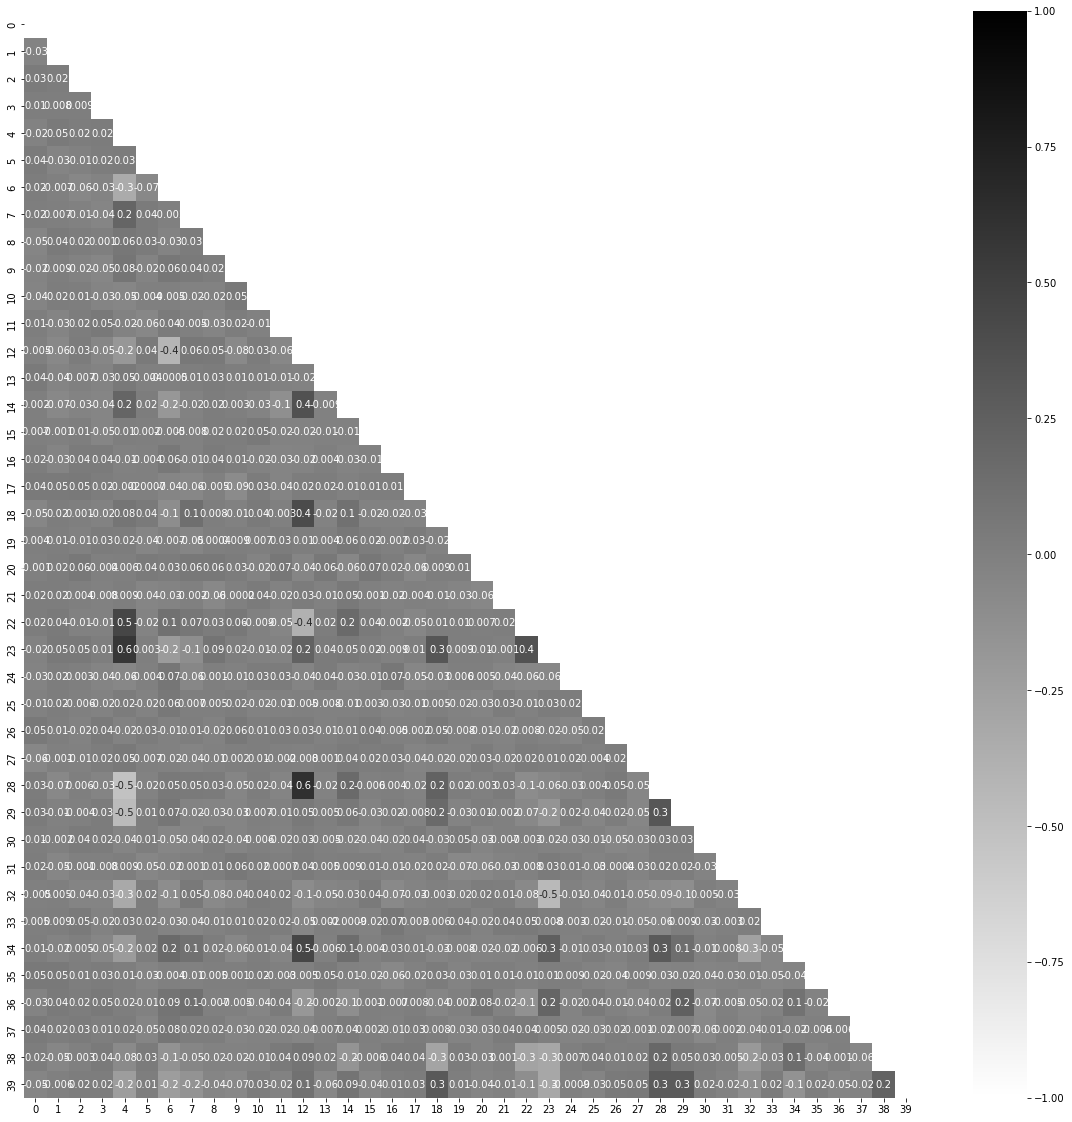

In [10]:
mask = np.triu(np.ones_like(df.corr()))

plt.figure(figsize = [20,20])
sns.heatmap(df.corr(), mask = mask, cmap = 'binary', vmin = -1, vmax = 1, annot = True, fmt = '.1')

# 독립변수들간 상관관계가 뚜렷하게 보이지 않는다.
### 몇 가지만 -0.5~ 0.5 사이로 상관관계가 보이는 것이 있어 상관관계가 보이는 독립변수들만 보도록 함 

<AxesSubplot:>

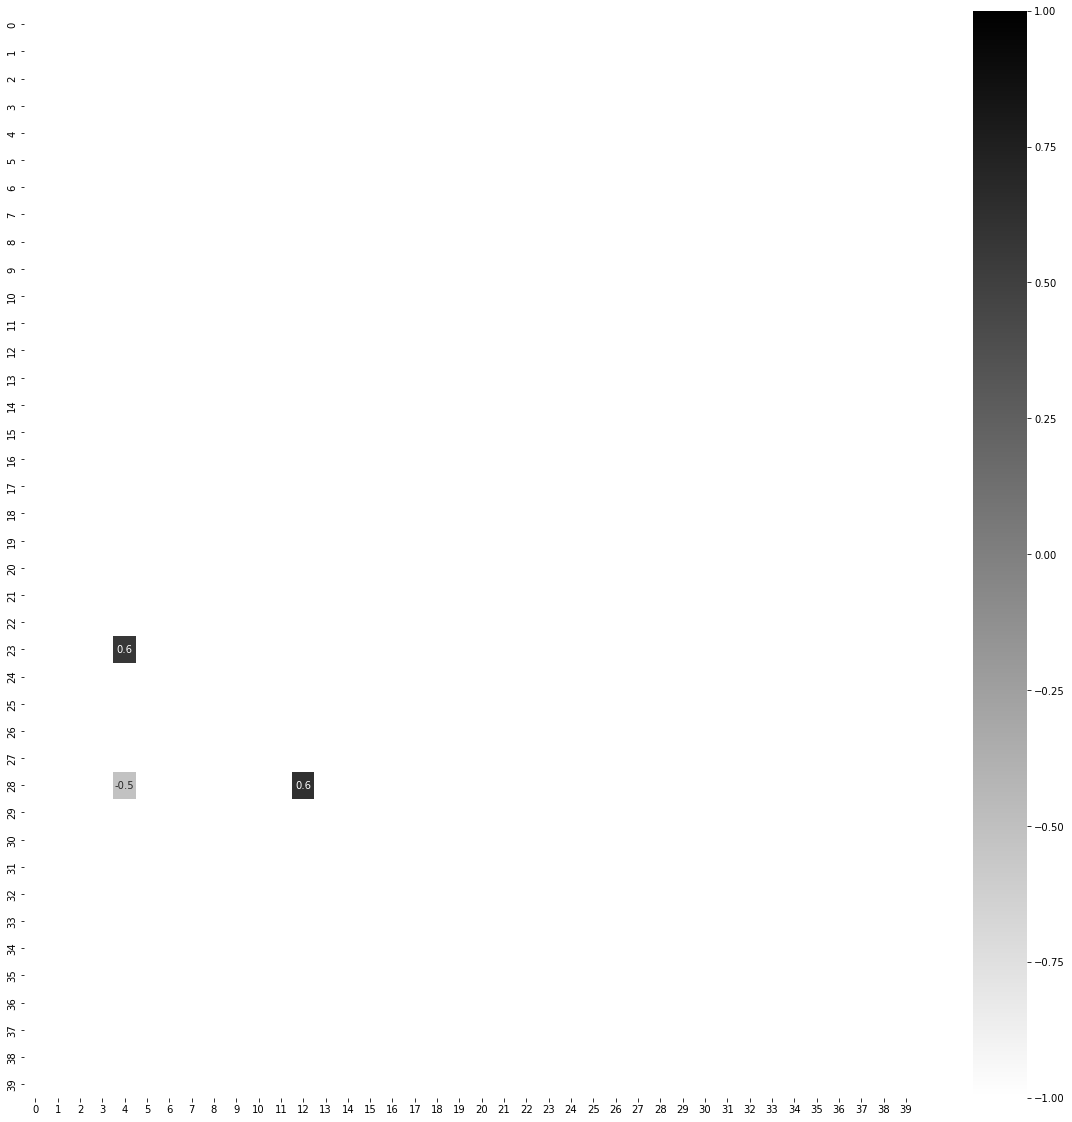

In [11]:
corr = df.corr()

cond = corr[(corr > 0.5) | (corr < -0.5)]

plt.figure(figsize = [20,20])
sns.heatmap(cond, mask = mask, cmap = 'binary', vmin = -1, vmax = 1, annot = True, fmt = '.1')

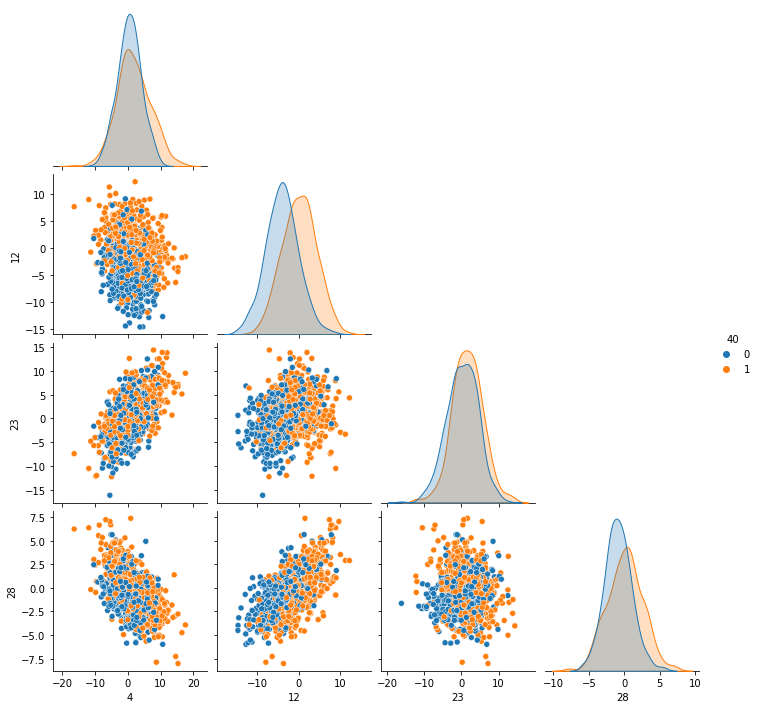

In [12]:
corr_cols = ['4','12','23','28','40']

sns.pairplot(df.loc[:,corr_cols], hue = '40',corner = True)

# 12번과 28번, 4번과 28번, 4번과 23번 정도가 선형성을 보이는 것을 확인 가능

# Modeling 

In [13]:
x_train,y_train,x_test,y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size = 0.2)

# 10개의 validation set 으로 나눠 평가 후 최적의 K 개를 찾도록 함 

In [14]:
cv = KFold(n_splits = 10)

valid_df = x_train.join(x_test)

avg_score = []

for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors = k)
    score_list = []

    for v,t in cv.split(valid_df):
        v_train_feature = valid_df.iloc[v,:-1]
        v_train_target = valid_df.iloc[v,-1]
        v_test_feature = valid_df.iloc[t,:-1]
        v_test_target = valid_df.iloc[t,-1]
        
        model.fit(v_train_feature, v_train_target)
        score = model.score(v_test_feature,v_test_target)

        
        score_list.append(score)
        
    avg_score.append(sum(score_list) / len(score_list))
    
    
avg_score

[0.8761708860759493,
 0.8673575949367087,
 0.8974050632911391,
 0.8874208860759494,
 0.889873417721519,
 0.8811550632911394,
 0.8936550632911393,
 0.8861708860759494,
 0.8936550632911391,
 0.894889240506329,
 0.8898734177215191,
 0.8911550632911392,
 0.8799050632911392,
 0.8786550632911393,
 0.8786550632911393,
 0.8786867088607595,
 0.8773734177215189,
 0.8811550632911394,
 0.869873417721519]

Text(0.5, 1.0, 'best_k is 2 \n accuracy = 0.897')

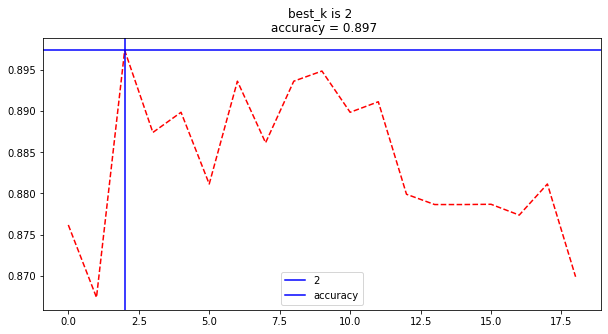

In [15]:
plt.figure(figsize = [10,5])
plt.plot(avg_score, ls = '--', c = 'r')
plt.axvline (x = avg_score.index(max(avg_score)), c = 'b', label = avg_score.index(max(avg_score)))
plt.axhline (y = max(avg_score), label = 'accuracy', c ='b')
plt.ylim = [0.65 , 1]
plt.legend()
plt.title(f'best_k is {avg_score.index(max(avg_score))} \n accuracy = {round(max(avg_score),3)}')

## 본래 K는 홀수 개로 하는 것이 맞으나, 현재는 4개의 이웃이 가장 적합하다고 판단되어 K는 4개로 모델 설정 후 예측

In [16]:
model = KNeighborsClassifier(n_neighbors = 4)

In [17]:
model.fit(df.iloc[:,:-1], df.iloc[:,-1])

KNeighborsClassifier(n_neighbors=4)

In [18]:
predict = model.predict(test)

idx = list(range(1,len(predict)+1))


submission = pd.DataFrame({'Solution': predict,
                           'Id':idx})

submission

,Solution,Id
0,1,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
8995,1,8996
8996,1,8997
8997,1,8998
8998,0,8999


In [19]:
submission.to_csv('submission.csv',index = False)
submission = pd.read_csv('/kaggle/working/submission.csv')
submission

,Solution,Id
0,1,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
8995,1,8996
8996,1,8997
8997,1,8998
8998,0,8999
